# 1. Packages

In [31]:
# Import packages

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# 2. Data

In [113]:
# Read both Train and Test csv files

original_test_df = pd.read_csv("test.csv")
original_train_df = pd.read_csv("train.csv")

In [114]:
original_test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [115]:
original_train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# 3. Data analysis

<AxesSubplot: >

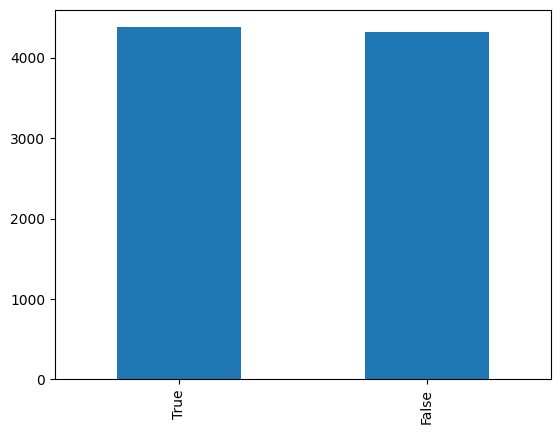

In [116]:
plot_df = original_train_df.Transported.value_counts()
plot_df.plot(kind="bar")

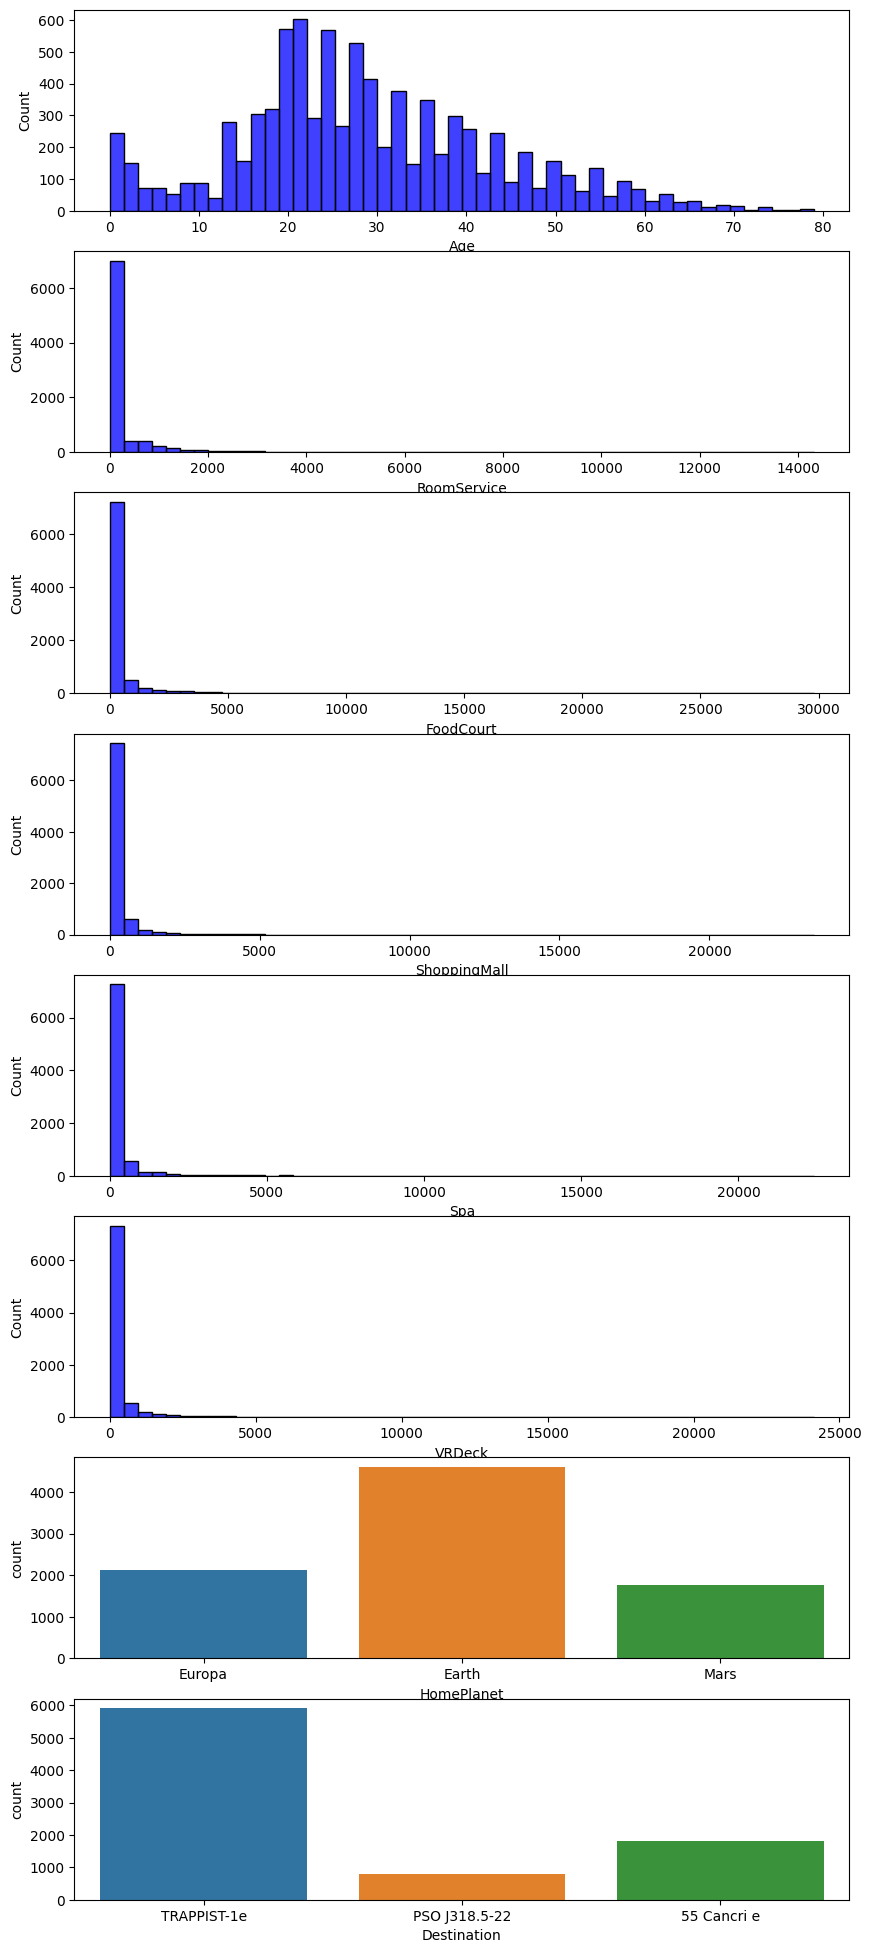

In [36]:
fig, ax = plt.subplots(8,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(original_train_df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(original_train_df['RoomService'], color='b', bins=50, ax=ax[1]);
sns.histplot(original_train_df['FoodCourt'], color='b', bins=50, ax=ax[2]);
sns.histplot(original_train_df['ShoppingMall'], color='b', bins=50, ax=ax[3]);
sns.histplot(original_train_df['Spa'], color='b', bins=50, ax=ax[4]);
sns.histplot(original_train_df['VRDeck'], color='b', bins=50, ax=ax[5]);
sns.countplot(x= original_train_df['HomePlanet'], ax=ax[6]);
sns.countplot(x= original_train_df['Destination'], ax=ax[7]);

<AxesSubplot: xlabel='RoomService', ylabel='Count'>

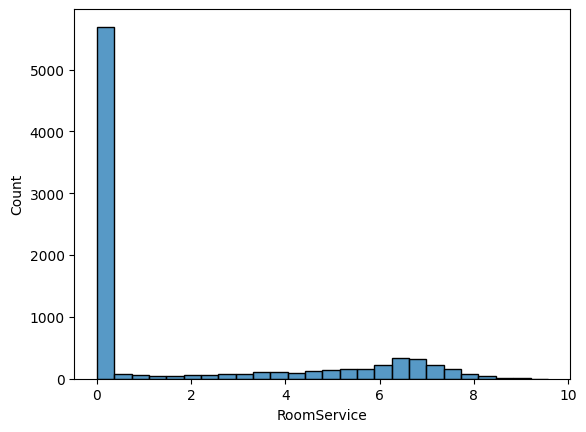

In [38]:
sns.histplot(np.log(original_train_df["RoomService"], where=(original_train_df["RoomService"]!=0)))

<AxesSubplot: >

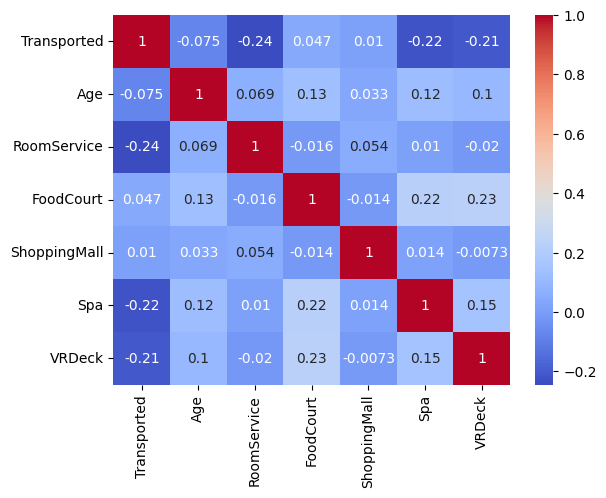

In [39]:
num_cols = ['Transported', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
sns.heatmap(data=original_train_df[num_cols].corr(), annot=True, cmap='coolwarm')

In [40]:
original_train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [41]:
original_train_df[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


In [42]:
original_train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [43]:
original_train_df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506332
1,True,0.381910


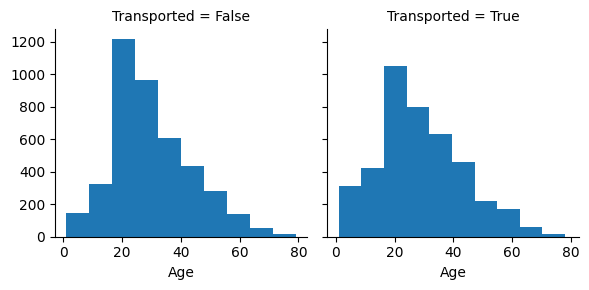

In [44]:
g = sns.FacetGrid(original_train_df[original_train_df['Age'] > 0], col='Transported')
g.map(plt.hist, 'Age', bins=10)

In [45]:
df_group_analysis = original_train_df
df_group_analysis[['PassengerGroup', 'Passenger']] = df_group_analysis['PassengerId'].str.split('_', expand=True)
group_size_dict = df_group_analysis['PassengerGroup'].value_counts().to_dict()
df_group_analysis['Group_size'] = df_group_analysis['PassengerGroup'].map(group_size_dict)
df_group_analysis[['Group_size', 'Transported']].groupby(['Group_size'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Group_size,Transported
3,4,0.640777
5,6,0.614943
2,3,0.593137
4,5,0.592453
6,7,0.541126
1,2,0.538050
0,1,0.452445
7,8,0.394231


<AxesSubplot: xlabel='Age', ylabel='Density'>

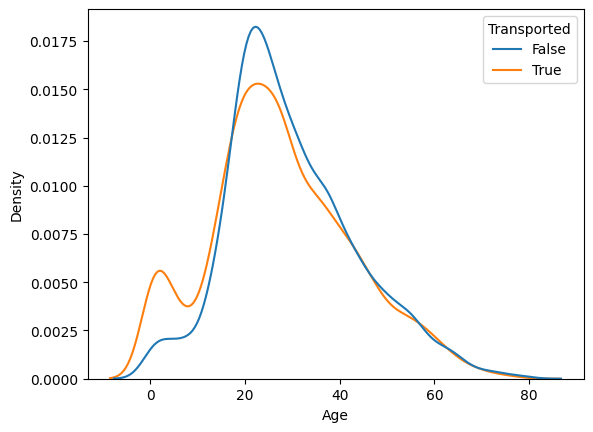

In [46]:
sns.kdeplot(data=original_train_df, x='Age', hue='Transported')

<AxesSubplot: xlabel='Age', ylabel='Count'>

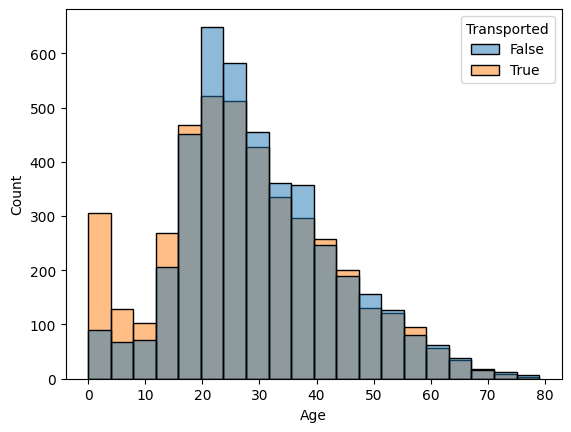

In [47]:
sns.histplot(data=original_train_df, x='Age', hue='Transported', bins=20)

<AxesSubplot: xlabel='RoomService', ylabel='Density'>

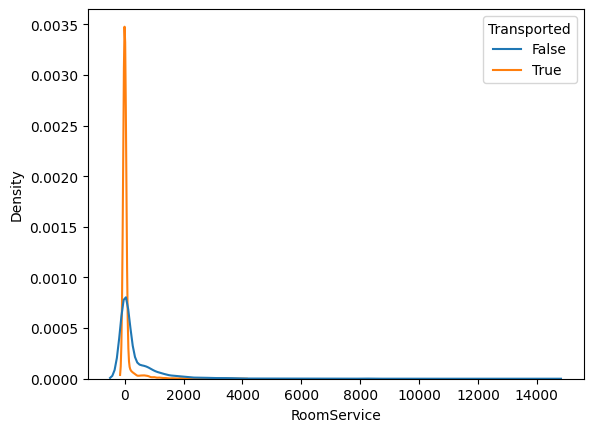

In [48]:
sns.kdeplot(data= original_train_df, x= "RoomService", hue= "Transported")

<AxesSubplot: xlabel='RoomService', ylabel='Density'>

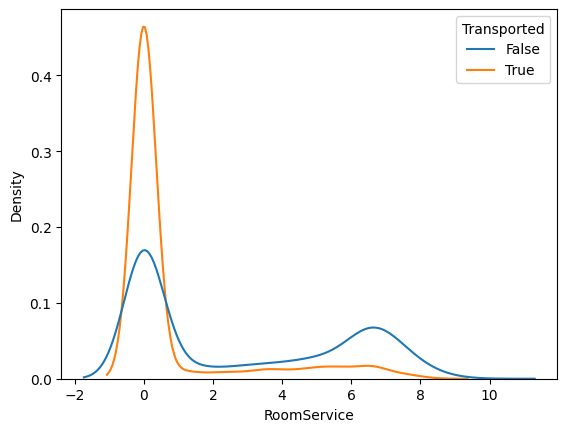

In [49]:
sns.kdeplot(data= original_train_df, x= np.log1p(original_train_df["RoomService"]), hue= "Transported")

# 4. Preprocessing functions
## Dealing with NaN

In [50]:
# Split Cabin column
def split_cabins (df):
    
    # Split "Cabin" column in 3 columns and drop the original one
    df[['Cabin_1', 'Cabin_2', 'Cabin_3']] = df['Cabin'].str.split('/',expand=True)
    df.drop(columns="Cabin", inplace=True)
    return df

In [51]:
# Split the PassengerId column to extract the group
def split_passenger(df):
    df[['PassengerGroup', 'Passenger']] = df['PassengerId'].str.split('_', expand=True)
    df.drop(columns = ['Passenger'], inplace=True)
    return df

In [52]:
# Replace nan values
def nan_values(df):
    
    # Replace "HomePlanet" null values with "Earth"
    df["HomePlanet"].fillna("Earth", inplace=True)
    # Replace "CryoSleep" null values with False
    df["CryoSleep"].fillna(False, inplace=True)
    # Replace "Destination" null values with "TRAPPIST-1e"
    df.loc[df["Destination"].isnull(), "Destination"] = "TRAPPIST-1e"

    # Replace rows with "Age" null values with mean
    imputer = SimpleImputer(strategy="mean") 
    imputer.fit(df[['Age']])
    df['Age'] = imputer.transform(df[['Age']])

    # Replace "VIP" null values with False, then Trues to 1 and Falses to 0
    df.loc[df["VIP"].isnull(), "VIP"] = False
    # Replace "RoomService" null values with 0
    df.loc[df["RoomService"].isnull(), "RoomService"] = 0
    # Replace "FoodCourt" null values with 0
    df.loc[df["FoodCourt"].isnull(), "FoodCourt"] = 0
    # Replace "ShoppingMall" null values with 0
    df.loc[df["ShoppingMall"].isnull(), "ShoppingMall"] = 0
    # Replace "Spa" null values with 0
    df.loc[df["Spa"].isnull(), "Spa"] = 0
    # Replace "VRDeck" null values with 0
    df.loc[df["VRDeck"].isnull(), "VRDeck"] = 0
    
    # Replace Cabin_1, 2, and 3 rows with null values with most frequent value
    # Instantiate a SimpleImputer
    imputer = SimpleImputer(strategy="most_frequent") 
    imputer.fit(df[['Cabin_1']])
    df['Cabin_1'] = imputer.transform(df[['Cabin_1']])

    imputer = SimpleImputer(strategy="most_frequent") 
    imputer.fit(df[['Cabin_2']])
    df['Cabin_2'] = imputer.transform(df[['Cabin_2']])
    df['Cabin_2'] = df['Cabin_2'].astype(int)

    imputer = SimpleImputer(strategy="most_frequent") 
    imputer.fit(df[['Cabin_3']])
    df['Cabin_3'] = imputer.transform(df[['Cabin_3']])
    
    return df


In [53]:
# Replace nan values with KNNImputer
from sklearn.impute import KNNImputer
def nan_values_knn(df):
    
    imputer = KNNImputer(n_neighbors=5)
    imputer.fit_transform(df)
    
    return df

## Encoding, scaling...

In [54]:
def encoding(df, set):
    
    # Drop PassengerId and Name columns
    df.drop(["PassengerId", "Name"], axis=1, inplace= True)
    # Replace "VIP" Trues with 1 and Falses with 0
    df["VIP"] = df["VIP"].astype(int)

    # Replace "CryoSleep" Trues with 1 and Falses with 0
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    
    if set == "train":
        # Replace "Transported" Trues with 1 and Falses with 0
        df["Transported"] = df["Transported"].astype(int)
    
    # Instantiate the OneHotEncoder
    ohe_1 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_1.fit(df[['HomePlanet']])
    # Transform the current "HomePlanet" column
    df[ohe_1.get_feature_names_out()] = ohe_1.transform(df[['HomePlanet']]) 
    # Drop the column "HomePlanet" which has been encoded
    df.drop(columns = ["HomePlanet"], inplace = True)
    
    # Instantiate the OneHotEncoder
    ohe_2 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_2.fit(df[['Destination']])
    # Transform the current "Destination" column
    df[ohe_2.get_feature_names_out()] = ohe_2.transform(df[['Destination']]) 
    # Drop the column "Destination" which has been encoded
    df.drop(columns = ["Destination"], inplace = True)
    
    # Encoding Cabin_1 with order
    # Instantiate the Ordinal Encoder
    ordinal_encoder = OrdinalEncoder(categories = [["A", "B", "C", "D", "E", "F", "G", "T"]])
    # Fit it
    ordinal_encoder.fit(df[["Cabin_1"]]) 
    # Transforming categories into ordered numbers
    df["encoded_Cabin_1"] = ordinal_encoder.transform(df[["Cabin_1"]])
    # Showing the transformed classes
    df.drop(columns= "Cabin_1", inplace=True)
    
    # Encoding Cabin_3
    # Instantiate the OneHotEncoder
    ohe_4 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_4.fit(df[['Cabin_3']])
    # Transform the current "Cabin_3" column
    df[ohe_4.get_feature_names_out()] = ohe_4.transform(df[['Cabin_3']]) 
    # Drop the column "Cabin_3" which has been encoded
    df.drop(columns = ["Cabin_3"], inplace = True)
    
    return df
    

In [55]:
def encoding_knn(df):
    
    # Drop PassengerId and Name columns
    df.drop(["PassengerId", "Name"], axis=1, inplace= True)
    
    # Change the columns with object types
    df['CryoSleep'] = df['CryoSleep'].astype(bool)
    df['VIP'] = df['VIP'].astype(bool)
    df['Cabin_2'] = df['Cabin_2'].astype(float)
    
    # Instantiate the OneHotEncoder
    ordinal_encoder = OrdinalEncoder(categories = [['Europa', 'Earth', 'Mars']], handle_unknown='use_encoded_value', unknown_value= np.nan) 
    # Fit encoder
    ordinal_encoder.fit(df[['HomePlanet']])
    # Transform the current "HomePlanet" column
    df['Encoded_HomePlanet'] = ordinal_encoder.transform(df[['HomePlanet']]) 
    # Drop the column "HomePlanet" which has been encoded
    df.drop(columns = ["HomePlanet"], inplace = True)
    
    # Instantiate the OneHotEncoder
    ordinal_encoder = OrdinalEncoder(categories = [['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']], handle_unknown='use_encoded_value', unknown_value= np.nan) 
    # Fit encoder
    ordinal_encoder.fit(df[['Destination']])
    # Transform the current "HomePlanet" column
    df['Encoded_Destination'] = ordinal_encoder.transform(df[['Destination']]) 
    # Drop the column "HomePlanet" which has been encoded
    df.drop(columns = ["Destination"], inplace = True)
    
    # Encoding Cabin_1 with order
    # Instantiate the Ordinal Encoder
    ordinal_encoder = OrdinalEncoder(categories = [["A", "B", "C", "D", "E", "F", "G", "T"]], handle_unknown='use_encoded_value', unknown_value= np.nan) 
    # Fit it
    ordinal_encoder.fit(df[["Cabin_1"]]) 
    # Transforming categories into ordered numbers
    df["Encoded_Cabin_1"] = ordinal_encoder.transform(df[["Cabin_1"]])
    # Showing the transformed classes
    df.drop(columns= "Cabin_1", inplace=True)
    
    # Instantiate the Ordinal Encoder
    ordinal_encoder = OrdinalEncoder(categories = [["P", "S"]], handle_unknown='use_encoded_value', unknown_value= np.nan) 
    # Fit it
    ordinal_encoder.fit(df[["Cabin_3"]]) 
    # Transforming categories into ordered numbers
    df["Encoded_Cabin_3"] = ordinal_encoder.transform(df[["Cabin_3"]])
    # Showing the transformed classes
    df.drop(columns= "Cabin_3", inplace=True)
    
    return df

In [56]:
def encoding_knn_ohe(df):
    # Instantiate the OneHotEncoder
    ohe_1 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_1.fit(df[['Encoded_HomePlanet']])
    # Transform the current "HomePlanet" column
    df[ohe_1.get_feature_names_out()] = ohe_1.transform(df[['Encoded_HomePlanet']]) 
    # Drop the column "HomePlanet" which has been encoded
    df.drop(columns = ["Encoded_HomePlanet"], inplace = True)
    
    # Instantiate the OneHotEncoder
    ohe_2 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_2.fit(df[['Encoded_Destination']])
    # Transform the current "Destination" column
    df[ohe_2.get_feature_names_out()] = ohe_2.transform(df[['Encoded_Destination']]) 
    # Drop the column "Destination" which has been encoded
    df.drop(columns = ["Encoded_Destination"], inplace = True)
    
    # Instantiate the OneHotEncoder
    ohe_4 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_4.fit(df[['Encoded_Cabin_3']])
    # Transform the current "Cabin_3" column
    df[ohe_4.get_feature_names_out()] = ohe_4.transform(df[['Encoded_Cabin_3']]) 
    # Drop the column "Cabin_3" which has been encoded
    df.drop(columns = ["Encoded_Cabin_3"], inplace = True)
    
    return df

In [57]:
# Encoding Cabin_1 without order

def encoding_no_order(df, set):
    
    # Drop PassengerId and Name columns
    df.drop(["PassengerId", "Name"], axis=1, inplace= True)
    # Replace "VIP" Trues with 1 and Falses with 0
    df["VIP"] = df["VIP"].astype(int)

    # Replace "CryoSleep" Trues with 1 and Falses with 0
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    
    if set == "train":
        # Replace "Transported" Trues with 1 and Falses with 0
        df["Transported"] = df["Transported"].astype(int)
    
    # Instantiate the OneHotEncoder
    ohe_1 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_1.fit(df[['HomePlanet']])
    # Transform the current "HomePlanet" column
    df[ohe_1.get_feature_names_out()] = ohe_1.transform(df[['HomePlanet']]) 
    # Drop the column "HomePlanet" which has been encoded
    df.drop(columns = ["HomePlanet"], inplace = True)
    
    # Instantiate the OneHotEncoder
    ohe_2 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_2.fit(df[['Destination']])
    # Transform the current "Destination" column
    df[ohe_2.get_feature_names_out()] = ohe_2.transform(df[['Destination']]) 
    # Drop the column "Destination" which has been encoded
    df.drop(columns = ["Destination"], inplace = True)
    
    # Encoding Cabin_1 without order, with One Hot Encoder
    # Instantiate the OneHotEncoder
    ohe_3 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_3.fit(df[['Cabin_1']])
    # Transform the current "Cabin_1" column
    df[ohe_3.get_feature_names_out()] = ohe_3.transform(df[['Cabin_1']]) 
    # Drop the column "Cabin_1" which has been encoded
    df.drop(columns = ["Cabin_1"], inplace = True)
    
    # Instantiate the OneHotEncoder
    ohe_4 = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe_4.fit(df[['Cabin_3']])
    # Transform the current "Cabin_3" column
    df[ohe_4.get_feature_names_out()] = ohe_4.transform(df[['Cabin_3']]) 
    # Drop the column "Cabin_3" which has been encoded
    df.drop(columns = ["Cabin_3"], inplace = True)
    
    return df

In [58]:
def passenger_grouping(df):
    group_size_dict = df['PassengerGroup'].value_counts().to_dict()
    df['Group_size'] = df['PassengerGroup'].map(group_size_dict)
    df.drop(columns= "PassengerGroup", inplace= True)
    return df

In [59]:
# One Hot Encode the new column "Group_size"
def grouping_encoding(df):
    # Instantiate the OneHotEncoder
    ohe = OneHotEncoder(sparse = False) 
    # Fit encoder
    ohe.fit(df[['Group_size']])
    # Transform the current "Cabin_3" column
    df[ohe.get_feature_names_out()] = ohe.transform(df[['Group_size']]) 
    # Drop the column "Cabin_3" which has been encoded
    df.drop(columns = ["Group_size"], inplace = True)
    return df

In [60]:
def scaling(df):
    
    # Step 0 - Instanciate Standard Scaler
    std_scaler = StandardScaler()
    # Step 1- Fit the scaler
    std_scaler.fit(df[['Age']]) 
    # 2-Scale/Transform
    # <-> apply the transformation (value - median) / IQR for every house
    df['Age'] = std_scaler.transform(df[['Age']])
    
    # Step 0 - Instanciate Standard Scaler
    std_scaler = StandardScaler()
    # Step 1- Fit the scaler
    std_scaler.fit(df[['RoomService']]) 
    # 2-Scale/Transform
    df['RoomService'] = std_scaler.transform(df[['RoomService']])

    # Step 0 - Instanciate Standard Scaler
    std_scaler = StandardScaler()
    # Step 1- Fit the scaler
    std_scaler.fit(df[['FoodCourt']]) 
    # 2-Scale/Transform
    df['FoodCourt'] = std_scaler.transform(df[['FoodCourt']])

    # Step 0 - Instanciate Standard Scaler
    std_scaler = StandardScaler()
    # Step 1- Fit the scaler
    std_scaler.fit(df[['ShoppingMall']]) 
    # 2-Scale/Transform
    df['ShoppingMall'] = std_scaler.transform(df[['ShoppingMall']])

    # Step 0 - Instanciate Standard Scaler
    std_scaler = StandardScaler()
    # Step 1- Fit the scaler
    std_scaler.fit(df[['Spa']]) 
    # 2-Scale/Transform
    df['Spa'] = std_scaler.transform(df[['Spa']])

    # Step 0 - Instanciate Standard Scaler
    std_scaler = StandardScaler()
    # Step 1- Fit the scaler
    std_scaler.fit(df[['VRDeck']]) 
    # 2-Scale/Transform
    df['VRDeck'] = std_scaler.transform(df[['VRDeck']])

    return df

In [79]:
# Scaling with logarithm for expenses columns (RoomService, ...)
def scaling_log(df):
    
    # Step 0 - Instanciate Standard Scaler
    std_scaler = StandardScaler()
    # Step 1- Fit the scaler
    std_scaler.fit(df[['Age']]) 
    # 2-Scale/Transform
    # <-> apply the transformation (value - median) / IQR for every house
    df['Age'] = std_scaler.transform(df[['Age']])
    
    df['RoomService'] = np.log(df['RoomService'], where= (df['RoomService'] != 0))
    
    df['FoodCourt'] = np.log(df['FoodCourt'], where= (df['FoodCourt'] != 0))
    
    df['ShoppingMall'] = np.log(df['ShoppingMall'], where= (df['ShoppingMall'] != 0))
    
    df['Spa'] = np.log(df['Spa'], where= (df['Spa'] != 0))
    
    df['VRDeck'] = np.log(df['VRDeck'], where= (df['VRDeck'] != 0))

    return df

In [61]:
# Full function
def full_preprocessing(df, set):
    df = split_cabins(df)
    df = nan_values(df)
    if set == "train":
        df = encoding(df, "train")
    else:
        df = encoding(df, "test")
    df = scaling(df)
    return df

In [62]:
# Full function with a different order to adapt to KNN Imputer
def full_preprocessing_knn(df):
    df = split_cabins(df)
    df = encoding_knn(df)
    df = nan_values_knn(df)
    df = scaling(df)
    return df

In [138]:
# Full function
def full_preprocessing_grouping(df, set):
    df = split_cabins(df)
    df = split_passenger(df)
    df = nan_values(df)
    if set == "train":
        df = encoding(df, "train")
    else:
        df = encoding(df, "test")
    df = scaling(df)
    df = passenger_grouping(df)
    df = grouping_encoding(df)
    return df

In [145]:
# Full function with log
def full_preprocessing_grouping_log(df, set):
    df = split_cabins(df)
    df = split_passenger(df)
    df = nan_values(df)
    if set == "train":
        df = encoding(df, "train")
    else:
        df = encoding(df, "test")
    df = scaling_log(df)
    df = passenger_grouping(df)
    # df = grouping_encoding(df)
    df.drop(columns = ["Cabin_2"], inplace = True)
    return df


# 5. Modelling

## 5.1. Simple Random Forest Classifier

In [117]:
train_df_1 = original_train_df.copy()
train_df_1 = full_preprocessing(train_df_1, "train")

In [118]:
train_df_1

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_2,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,encoded_Cabin_1,Cabin_3_P,Cabin_3_S
0,0,0.709437,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0,-0.336717,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1,0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0
2,0,2.034566,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,0.290975,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,-0.894666,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1,1,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0.848924,1,-0.333105,3.992336,-0.283579,1.189173,-0.197751,0,98,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8689,1,-0.755179,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,1499,1.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0
8690,0,-0.197230,0,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,1,1500,1.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0
8691,0,0.221232,0,-0.333105,0.376365,-0.283579,0.043013,2.589576,0,608,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0


<AxesSubplot: xlabel='RoomService', ylabel='Count'>

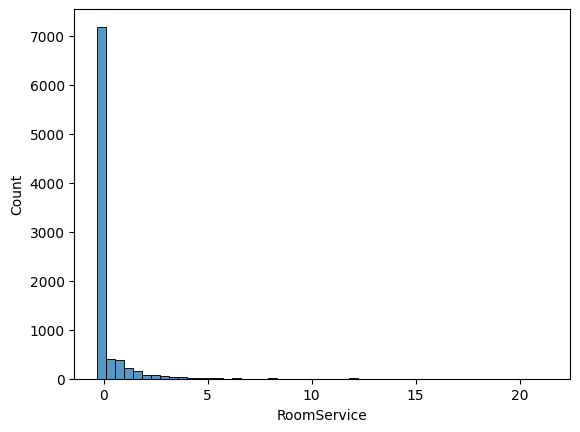

In [119]:
sns.histplot(train_df_1["RoomService"], bins=50)

## Cross validation

In [151]:
def cross_validation(X, y, model):
    cv_results = cross_validate(model, X, y, cv=5,
                                scoring=['accuracy']
    )
    print(pd.DataFrame(cv_results)) # Cross validation output

In [152]:
X_1 = train_df_1.drop(columns = "Transported")
y_1 = train_df_1["Transported"]
RFC_model_1 = RandomForestClassifier()
cross_validation(X_1, y_1, RFC_model_1)

   fit_time  score_time  test_accuracy
0  0.438261    0.019433       0.753306
1  0.431951    0.021088       0.758482
2  0.453328    0.021344       0.805635
3  0.431853    0.020641       0.814730
4  0.427088    0.018928       0.779632


## Fit the model with the full train test

In [124]:
RFC_model_1.fit(X_1, y_1)

RandomForestClassifier()

## Preprocess prediction

In [125]:
test_df_1 = original_test_df.copy()
test_df_1 = full_preprocessing(test_df_1, "test")

## Prediction

In [126]:
prediction_1 = RFC_model_1.predict(test_df_1)

## Create the submission file

In [127]:
def create_csv(prediction, pred_number):
    prediction_df = pd.DataFrame(columns=("PassengerId", "Transported"))
    prediction_df["PassengerId"] = original_test_df["PassengerId"]
    prediction_df["Transported"] = prediction.astype(bool)
    csv_name = f'submission_2023-04-17_{pred_number}.csv'
    prediction_df.to_csv(csv_name, index=False)

In [128]:
create_csv(prediction_1, 1)

## 5.2. Another method dropping the Cabin number column

In [585]:
train_df_2 = train_df.copy()
train_df_2 = train_df_2.drop(columns="Cabin_2")
X_2 = train_df_2.drop(columns = "Transported")
y_2 = train_df_2["Transported"]
RFC_model_2 = RandomForestClassifier()
cv_results_2 = cross_validate(RFC_model_2, X_2, y_2, cv=5,
                            scoring=['r2']
)
pd.DataFrame(cv_results_2)

,fit_time,score_time,test_r2
0,0.399654,0.022221,0.086780
1,0.391022,0.022359,0.107483
2,0.390657,0.022209,0.190294
3,0.391697,0.023754,0.173724
4,0.389693,0.021656,0.136898


In [582]:
RFC_model_2.fit(X_2, y_2)

RandomForestClassifier()

In [583]:
X_pred_2 = test_df.copy()
X_pred_2 = X_pred_2.drop(columns="Cabin_2")
prediction_2 = RFC_model_2.predict(X_pred_2)
create_csv(prediction_2, 2)

### --> This second trial is not valid, it gives worse scoring.

## 5.3. Another trial with One Hot Encoder for Cabin_1

In [560]:
# Preprocess train
train_df_3 = original_train_df.copy()
train_df_3 = full_preprocessing(train_df_3, "train")

# Cross validation
X_3 = train_df_3.drop(columns = "Transported")
y_3 = train_df_3["Transported"]
RFC_model_3 = RandomForestClassifier()
cross_validation(X_3, y_3, RFC_model_3)

   fit_time  score_time   test_r2
0  0.440749    0.019619  0.049976
1  0.432910    0.020627  0.029273
2  0.447297    0.020257  0.220198
3  0.436437    0.020451  0.284201
4  0.433925    0.019513  0.139199


In [584]:
# Fit model
RFC_model_3.fit(X_3, y_3)

# Preprocess prediction
test_df_3 = original_test_df.copy()
test_df_3 = full_preprocessing(test_df_3, "test")

# Prediction
prediction_3 = RFC_model_3.predict(test_df_3)

# Submission file
create_csv(prediction_3, 3)

### --> Still worse scoring

## 5.4. Optimizing parameters

In [154]:
# Preprocess train
train_df_4 = original_train_df.copy()
train_df_4 = full_preprocessing(train_df_4, "train")

# X and y
X_4 = train_df_4.drop(columns = "Transported")
y_4 = train_df_4["Transported"]

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [156]:
# Train/Test split
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.20, random_state=1) 
# Instanciate model
RFC_model_4 = RandomForestClassifier()
# Hyperparameter Grid
grid_4 = {'n_estimators': [150, 200, 500],
        'max_depth': [10, 15],
        'min_samples_split': [10, 15, 20],
        'min_samples_leaf': [1, 2, 5, 10, 15],
        'criterion': ['gini']}
# Instanciate Grid Search
search_4 = RandomizedSearchCV(RFC_model_4, grid_4,
                           scoring = 'r2',
                           cv = 5,
                           n_iter = 100,
                           n_jobs=-1 # paralellize computation
)
# Fit data to Grid Search
search_4.fit(X_train_4,y_train_4)
# Best score
print(search_4.best_score_)
# Best Params
print(search_4.best_params_)
# Best estimator
print(search_4.best_estimator_)

/Users/jaimesoroarubio/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.21656289641982723
{'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 15, 'criterion': 'gini'}
RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=15,
                       n_estimators=500)


In [158]:
# Cross validation
RFC_model_4 = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, min_samples_split=10, max_depth=10, criterion='gini')
cv_results_4 = cross_validate(RFC_model_4, X_4, y_4, cv=5,
                            scoring=['accuracy']
)
pd.DataFrame(cv_results_4)

,fit_time,score_time,test_accuracy
0,1.678787,0.070638,0.765957
1,1.676481,0.073750,0.765382
2,1.657526,0.072844,0.802185
3,1.638521,0.074422,0.822785
4,1.654242,0.072711,0.802071


In [589]:
# Fit model
RFC_model_4.fit(X_4, y_4)

# Preprocess prediction
test_df_4 = original_test_df.copy()
test_df_4 = full_preprocessing(test_df_4, "test")

# Prediction
prediction_4 = RFC_model_4.predict(test_df_4)

# Submission file
create_csv(prediction_4, 4)

## 5.5. With XGBoost

In [130]:
import xgboost as xgb

In [90]:
# Preprocess train
train_df_5 = original_train_df.copy()
train_df_5 = full_preprocessing(train_df_5, "train")

# X and y
X_5 = train_df_5.drop(columns = "Transported")
y_5 = train_df_5["Transported"]

In [91]:
# Train/Test split
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.20, random_state=1) 
# Instanciate model
XGB_model_5 = xgb.XGBClassifier()
# Hyperparameter Grid
grid_5 = {'eta': [0.3, 0.5],
        'gamma': [5, 10],
        'max_depth': [10, 15],
        'min_child_weight': [5, 10],
        'max_delta_step': [0, 5]}
# Instanciate Grid Search
search_5 = RandomizedSearchCV(XGB_model_5, grid_5,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
)
# Fit data to Grid Search
search_5.fit(X_train_5,y_train_5)
# Best score
print(search_5.best_score_)
# Best Params
print(search_5.best_params_)

0.22979578459420785
{'min_child_weight': 5, 'max_depth': 15, 'max_delta_step': 0, 'gamma': 10, 'eta': 0.3}


In [103]:
test_df_5 = original_test_df.copy()
test_df_5 = full_preprocessing(test_df_5, "test")
XGB_model_5 = xgb.XGBClassifier(min_child_weight= 5, max_depth= 10, max_delta_step= 0, gamma= 5, eta= 0.3)
XGB_model_5.fit(X_5, y_5)
prediction_5 = XGB_model_5.predict(test_df_5)
create_csv(prediction_5, 5)

## 5.6. XGBoost with KNNImputer

In [810]:
# Preprocess train
train_df_6 = original_train_df.copy()
train_df_6 = split_cabins(train_df_6)
train_df_6 = encoding_knn(train_df_6)
imputer_knn_6 = KNNImputer(n_neighbors=5)
imputer_knn_6.fit(train_df_6)
train_df_6 = pd.DataFrame(imputer_knn_6.transform(train_df_6), columns = train_df_6.columns)
train_df_6 = encoding_knn_ohe(train_df_6)

In [811]:
train_df_6 = scaling(train_df_6)

In [812]:
# X and y
X_6 = train_df_6.drop(columns = "Transported")
y_6 = train_df_6["Transported"]

test_df_6 = original_test_df.copy()
test_df_6 = split_cabins(test_df_6)
test_df_6 = encoding_knn(test_df_6)
imputer_knn_6 = KNNImputer(n_neighbors=5)
imputer_knn_6.fit(test_df_6)
test_df_6 = pd.DataFrame(imputer_knn_6.transform(test_df_6), columns = test_df_6.columns)
test_df_6 = encoding_knn_ohe(test_df_6)

In [813]:
XGB_model_6 = xgb.XGBClassifier(min_child_weight= 5, max_depth= 10, max_delta_step= 0, gamma= 5, eta= 0.3)
XGB_model_6.fit(X_6, y_6)
prediction_6 = XGB_model_6.predict(test_df_6)
create_csv(prediction_6, 6)

In [814]:
cross_validation(X_6, y_6, XGB_model_6)

   fit_time  score_time   test_r2
0  1.003089    0.002664 -0.025934
1  0.859127    0.003505  0.045375
2  0.863334    0.003643  0.160390
3  0.893249    0.002955  0.307217
4  0.942530    0.002539  0.166819


### --> Disaster, the Kaggle score drops to 0.50.

## 5.7. Using Passenger Group

In [159]:
train_df_7 = original_train_df.copy()
train_df_7 = full_preprocessing_grouping(train_df_7, 'train')

In [160]:
# X and y
X_7 = train_df_7.drop(columns = "Transported")
y_7 = train_df_7["Transported"]

In [161]:
train_df_7.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_2,...,Cabin_3_P,Cabin_3_S,Group_size_1,Group_size_2,Group_size_3,Group_size_4,Group_size_5,Group_size_6,Group_size_7,Group_size_8
0,0,0.709437,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.336717,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2.034566,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.290975,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,-0.894666,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
test_df_7 = original_test_df.copy()
test_df_7 = full_preprocessing_grouping(test_df_7, 'test')

In [163]:
test_df_7.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_2,HomePlanet_Earth,...,Cabin_3_P,Cabin_3_S,Group_size_1,Group_size_2,Group_size_3,Group_size_4,Group_size_5,Group_size_6,Group_size_7,Group_size_8
0,1,-0.118222,0,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,3,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.688601,0,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,4,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.166968,0,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.666051,0,-0.357339,4.121518,-0.312173,-0.104002,0.226648,1,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,-0.617304,0,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,5,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
XGB_model_7 = xgb.XGBClassifier(min_child_weight= 5, max_depth= 10, max_delta_step= 0, gamma= 5, eta= 0.3)
XGB_model_7.fit(X_7, y_7)
prediction_7 = XGB_model_7.predict(test_df_7)
create_csv(prediction_7, 7)

In [165]:
cross_validation(X_7, y_7, XGB_model_7)

   fit_time  score_time  test_accuracy
0  0.535596    0.001884       0.742956
1  0.472433    0.002675       0.736055
2  0.484145    0.001684       0.795285
3  0.461258    0.001855       0.823360
4  0.480953    0.001730       0.785961


## 5.8. XGBoost with Passenger Group and log for expenses

In [146]:
train_df_5_8 = original_train_df.copy()
train_df_5_8 = full_preprocessing_grouping_log(train_df_5_8, 'train')
# X and y
X_5_8 = train_df_5_8.drop(columns = "Transported")
y_5_8 = train_df_5_8["Transported"]

In [147]:
train_df_5_8.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,encoded_Cabin_1,Cabin_3_P,Cabin_3_S,Group_size
0,0,0.709437,0,0.709437,0.709437,0.709437,0.709437,0.709437,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
1,0,-0.336717,0,4.691348,2.197225,3.218876,6.308098,3.784190,1,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,1
2,0,2.034566,1,3.761200,8.182000,8.182000,8.812099,3.891820,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,0,0.290975,0,0.290975,7.156956,5.916202,8.110427,5.262690,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
4,0,-0.894666,0,5.713733,4.248495,5.017280,6.336826,0.693147,1,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,1


In [148]:
test_df_5_8 = original_test_df.copy()
test_df_5_8 = full_preprocessing_grouping_log(test_df_5_8, 'test')
test_df_5_8.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,encoded_Cabin_1,Cabin_3_P,Cabin_3_S,Group_size
0,1,-0.118222,0,-0.118222,-0.118222,-0.118222,-0.118222,-0.118222,1.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0,1
1,0,-0.688601,0,-0.688601,2.197225,2.197225,7.945555,7.945555,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,1
2,1,0.166968,0,0.166968,0.166968,0.166968,0.166968,0.166968,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1
3,0,0.666051,0,0.666051,8.802673,8.802673,5.198497,6.371612,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1
4,0,-0.617304,0,2.302585,2.302585,6.453625,6.453625,6.453625,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,1


In [153]:
XGB_model_5_8 = xgb.XGBClassifier(min_child_weight= 5, max_depth= 10, max_delta_step= 0, gamma= 5, eta= 0.3)
cross_validation(X_5_8, y_5_8, XGB_model_5_8)

   fit_time  score_time  test_accuracy
0  0.500411    0.001734       0.764807
1  0.444768    0.001880       0.774583
2  0.511541    0.001760       0.794135
3  0.517975    0.001684       0.800921
4  0.531470    0.001727       0.792865


In [150]:

XGB_model_5_8.fit(X_5_8, y_5_8)
prediction_5_8 = XGB_model_5_8.predict(test_df_5_8)
create_csv(prediction_5_8, 8)

# 6. Modelling with Tensorflow

## 6.1. With Tensorflow Decision Forest

In [89]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [90]:
def full_preprocessing_tf(df, set, encode= False, scale= False):
    df = split_cabins(df)
    df = split_passenger(df)
    df = nan_values(df)
    if encode:
        if set == "train":
            df = encoding(df, "train")
        else:
            df = encoding(df, "test")
    else:
        # Drop PassengerId and Name columns
        df.drop(["PassengerId", "Name"], axis=1, inplace= True)
        # Replace "VIP" Trues with 1 and Falses with 0
        df["VIP"] = df["VIP"].astype(int)
        # Replace "CryoSleep" Trues with 1 and Falses with 0
        df["CryoSleep"] = df["CryoSleep"].astype(int)
        if set == "train":
            # Replace "Transported" Trues with 1 and Falses with 0
            df["Transported"] = df["Transported"].astype(int)
    if scale:        
        df = scaling(df)
    df = passenger_grouping(df)
    if encode:
        df = grouping_encoding(df)
    return df

In [91]:
train_df_8 = original_train_df.copy()
train_df_8 = full_preprocessing_tf(train_df_8, 'train')

In [92]:
train_df_8

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group_size,Cabin_1,Cabin_2,Cabin_3
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,2,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,2,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,1,A,98,P
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1,G,1499,S
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1,G,1500,S
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,2,E,608,S


In [93]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_df_tf_8, valid_df_tf_8 = split_dataset(train_df_8)
print("{} examples in training, {} examples in testing.".format(
    len(train_df_tf_8), len(valid_df_tf_8)))

6909 examples in training, 1784 examples in testing.


In [94]:
train_ds_tf_8 = tfdf.keras.pd_dataframe_to_tf_dataset(train_df_tf_8, label="Transported")
valid_ds_tf_8 = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df_tf_8, label="Transported")

In [95]:
rf_tf_8 = tfdf.keras.RandomForestModel()
rf_tf_8.compile(metrics=["accuracy"]) # Optional, you can use this to include a list of eval metrics

Use /var/folders/jt/ljcpcwg95nv566n6vzs4822m0000gn/T/tmpj9rs8cr2 as temporary training directory


In [96]:
rf_tf_8.fit(x=train_ds_tf_8)

Reading training dataset...
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training dataset read in 0:00:02.307307. Found 6909 examples.
Training model...


2023-04-19 12:41:49.519220: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
[INFO 2023-04-19T12:41:50.226834+02:00 kernel.cc:1214] Loading model from path /var/folders/jt/ljcpcwg95nv566n6vzs4822m0000gn/T/tmpj9rs8cr2/model/ with prefix 1cbbeea246764441


Model trained in 0:00:01.057531
Compiling model...


[INFO 2023-04-19T12:41:50.604298+02:00 decision_forest.cc:661] Model loaded with 300 root(s), 269178 node(s), and 14 input feature(s).
[INFO 2023-04-19T12:41:50.604388+02:00 abstract_model.cc:1312] Engine "RandomForestOptPred" built
[INFO 2023-04-19T12:41:50.604406+02:00 kernel.cc:1046] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [97]:
tfdf.model_plotter.plot_model_in_colab(rf_tf_8, tree_idx=0, max_depth=3)

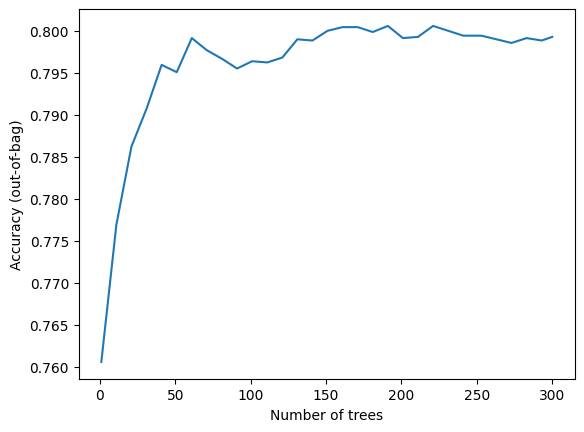

In [98]:
logs = rf_tf_8.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [99]:
inspector = rf_tf_8.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6909, accuracy=0.7992473585178752, loss=0.4554534650658187, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [100]:
evaluation = rf_tf_8.evaluate(x=valid_ds_tf_8,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 0.7960
loss: 0.0000
accuracy: 0.7960


In [101]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT


In [102]:
# Each line is: (feature name, (index of the feature), importance score)
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #4), 112.0),
 ("RoomService" (1; #9), 60.0),
 ("Spa" (1; #11), 56.0),
 ("VRDeck" (1; #13), 39.0),
 ("FoodCourt" (1; #6), 14.0),
 ("ShoppingMall" (1; #10), 14.0),
 ("Cabin_1" (4; #1), 5.0)]

In [103]:
# Load the test dataset
test_df_tf_8 = original_test_df.copy()
submission_id = test_df_tf_8.PassengerId

test_df_tf_8 = full_preprocessing_tf(test_df_tf_8, 'test')

# Convert pd dataframe to tf dataset
test_ds_tf_8 = tfdf.keras.pd_dataframe_to_tf_dataset(test_df_tf_8)

# Get the predictions for testdata
predictions = rf_tf_8.predict(test_ds_tf_8)
n_predictions = (predictions > 0.5).astype(bool)
output_tf_8 = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output_tf_8.head()

5/5 [==============================] - 0s 20ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [110]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('submission_2023-04-17_9.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


### Directly as the comments in Kaggle

In [105]:
dataset_df = original_train_df
dataset_df = dataset_df.drop(['PassengerId', 'Name'], axis=1)
dataset_df.head(5)
dataset_df.isnull().sum().sort_values(ascending=False)
dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
dataset_df.isnull().sum().sort_values(ascending=False)
label = "Transported"
dataset_df[label] = dataset_df[label].astype(int)
dataset_df['VIP'] = dataset_df['VIP'].astype(int)
dataset_df['CryoSleep'] = dataset_df['CryoSleep'].astype(int)
dataset_df[["Deck", "Cabin_num", "Side"]] = dataset_df["Cabin"].str.split("/", expand=True)
try:
    dataset_df = dataset_df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")
def split_dataset(dataset, test_ratio=0.20):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]
train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(len(train_ds_pd), len(valid_ds_pd)))
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"])
rf.fit(x=train_ds)
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

6974 examples in training, 1719 examples in testing.
Use /var/folders/jt/ljcpcwg95nv566n6vzs4822m0000gn/T/tmp7kuv0abl as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.172467. Found 6974 examples.
Training model...


[INFO 2023-04-19T12:42:05.201917+02:00 kernel.cc:1214] Loading model from path /var/folders/jt/ljcpcwg95nv566n6vzs4822m0000gn/T/tmp7kuv0abl/model/ with prefix ae190b0782dc4094


Model trained in 0:00:13.147843
Compiling model...
Model compiled.


[INFO 2023-04-19T12:42:05.567369+02:00 decision_forest.cc:661] Model loaded with 300 root(s), 226270 node(s), and 16 input feature(s).
[INFO 2023-04-19T12:42:05.567395+02:00 abstract_model.cc:1312] Engine "RandomForestGeneric" built
[INFO 2023-04-19T12:42:05.567408+02:00 kernel.cc:1046] Use fast generic engine


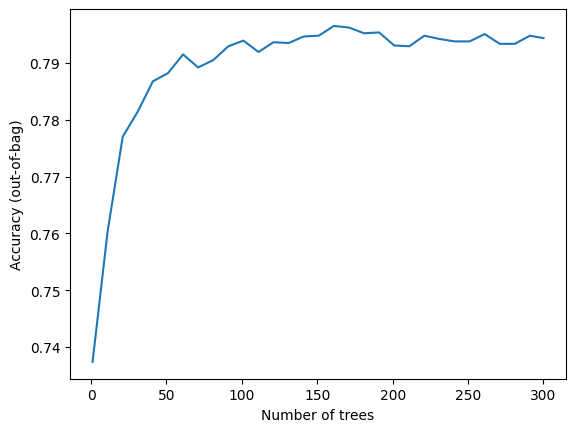

In [106]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [107]:
inspector = rf.make_inspector()
inspector.evaluation()
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - accuracy: 0.8034
loss: 0.0000
accuracy: 0.8034


In [108]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)
# Each line is: (feature name, (index of the feature), importance score)
inspector.variable_importances()["NUM_AS_ROOT"]

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES
	 SUM_SCORE
	 NUM_AS_ROOT


[("CryoSleep" (1; #2), 88.0),
 ("Spa" (1; #13), 60.0),
 ("VRDeck" (1; #15), 43.0),
 ("RoomService" (1; #10), 40.0),
 ("ShoppingMall" (1; #11), 24.0),
 ("Deck" (4; #3), 19.0),
 ("FoodCourt" (1; #5), 12.0),
 ("HomePlanet" (4; #7), 8.0),
 ("Group_size" (1; #6), 3.0),
 ("Age" (1; #0), 2.0),
 ("PassengerGroup" (4; #9), 1.0)]

In [112]:
# Load the test dataset
test_df = pd.read_csv('test.csv')
submission_id = test_df.PassengerId

# Replace NaN values with zero
test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].fillna(value=0)

# Creating New Features - Deck, Cabin_num and Side from the column Cabin and remove Cabin
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df = test_df.drop('Cabin', axis=1)

# Convert boolean to 1's and 0's
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

# Convert pd dataframe to tf dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

# Get the predictions for testdata
predictions = rf.predict(test_ds)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

ValueError: in user code:

    File "/Users/jaimesoroarubio/.pyenv/versions/3.10.6/lib/python3.10/site-packages/tensorflow_decision_forests/keras/core_inference.py", line 452, in run_step  *
        outputs = model.predict_step(data)
    File "/Users/jaimesoroarubio/.pyenv/versions/3.10.6/lib/python3.10/site-packages/keras/engine/training.py", line 2079, in predict_step  **
        return self(x, training=False)
    File "/Users/jaimesoroarubio/.pyenv/versions/3.10.6/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/var/folders/jt/ljcpcwg95nv566n6vzs4822m0000gn/T/__autograph_generated_filesmzufcu5.py", line 104, in tf__call
        ag__.if_stmt(ag__.ld(self)._semantics is None, if_body_2, else_body_2, get_state_3, set_state_3, ('do_return', 'retval_'), 2)
    File "/var/folders/jt/ljcpcwg95nv566n6vzs4822m0000gn/T/__autograph_generated_filesmzufcu5.py", line 43, in else_body_2
        normalized_inputs = ag__.converted_call(ag__.ld(self)._build_normalized_inputs, (ag__.ld(inputs),), None, fscope)
    File "/var/folders/jt/ljcpcwg95nv566n6vzs4822m0000gn/T/__autograph_generated_file5q_04298.py", line 98, in tf___build_normalized_inputs
        semantic_inputs = ag__.converted_call(ag__.ld(tf_core).combine_tensors_and_semantics, (ag__.ld(inputs), ag__.ld(self)._semantics), None, fscope)
    File "/var/folders/jt/ljcpcwg95nv566n6vzs4822m0000gn/T/__autograph_generated_file69k_sdjr.py", line 34, in tf__combine_tensors_and_semantics
        ag__.if_stmt(ag__.not_(ag__.converted_call(ag__.converted_call(ag__.ld(set), (ag__.converted_call(ag__.ld(semantics).keys, (), None, fscope),), None, fscope).issubset, (ag__.converted_call(ag__.ld(inputs).keys, (), None, fscope),), None, fscope)), if_body, else_body, get_state, set_state, (), 0)
    File "/var/folders/jt/ljcpcwg95nv566n6vzs4822m0000gn/T/__autograph_generated_file69k_sdjr.py", line 30, in if_body
        raise ag__.converted_call(ag__.ld(ValueError), (ag__.converted_call('semantics is not a subset of inputs (inputs={} vs semantics={}).'.format, (ag__.converted_call(ag__.ld(inputs).keys, (), None, fscope), ag__.converted_call(ag__.ld(semantics).keys, (), None, fscope)), None, fscope),), None, fscope)

    ValueError: Exception encountered when calling layer 'random_forest_model_1' (type RandomForestModel).
    
    in user code:
    
        File "/Users/jaimesoroarubio/.pyenv/versions/3.10.6/lib/python3.10/site-packages/tensorflow_decision_forests/keras/core_inference.py", line 637, in call  *
            normalized_inputs = self._build_normalized_inputs(inputs)
        File "/Users/jaimesoroarubio/.pyenv/versions/3.10.6/lib/python3.10/site-packages/tensorflow_decision_forests/keras/core_inference.py", line 596, in _build_normalized_inputs  *
            semantic_inputs = tf_core.combine_tensors_and_semantics(
        File "/Users/jaimesoroarubio/.pyenv/versions/3.10.6/lib/python3.10/site-packages/tensorflow_decision_forests/tensorflow/core_inference.py", line 425, in combine_tensors_and_semantics  *
            raise ValueError("semantics is not a subset of inputs "
    
        ValueError: semantics is not a subset of inputs (inputs=dict_keys(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Deck', 'Cabin_num', 'Side']) vs semantics=dict_keys(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'PassengerGroup', 'Passenger', 'Group_size', 'Deck', 'Cabin_num', 'Side'])).
    
    
    Call arguments received by layer 'random_forest_model_1' (type RandomForestModel):
      • inputs={'PassengerId': 'tf.Tensor(shape=(None,), dtype=string)', 'HomePlanet': 'tf.Tensor(shape=(None,), dtype=string)', 'CryoSleep': 'tf.Tensor(shape=(None,), dtype=int64)', 'Destination': 'tf.Tensor(shape=(None,), dtype=string)', 'Age': 'tf.Tensor(shape=(None,), dtype=float32)', 'VIP': 'tf.Tensor(shape=(None,), dtype=int64)', 'RoomService': 'tf.Tensor(shape=(None,), dtype=float32)', 'FoodCourt': 'tf.Tensor(shape=(None,), dtype=float32)', 'ShoppingMall': 'tf.Tensor(shape=(None,), dtype=float32)', 'Spa': 'tf.Tensor(shape=(None,), dtype=float32)', 'VRDeck': 'tf.Tensor(shape=(None,), dtype=float32)', 'Name': 'tf.Tensor(shape=(None,), dtype=string)', 'Deck': 'tf.Tensor(shape=(None,), dtype=string)', 'Cabin_num': 'tf.Tensor(shape=(None,), dtype=string)', 'Side': 'tf.Tensor(shape=(None,), dtype=string)'}
      • training=False


In [ ]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('submission_9.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
